In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu118
0.18.1+cu118


## 1. Getting a dataset

In [4]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
print(f"Image shape : {image.shape}") # Color Channels, Height, Width
print(f"Image Label : {class_names[label]}")

Image shape : torch.Size([1, 28, 28])
Image Label : Ankle boot


### 1.2 Visualizing Data

Text(0.5, 1.0, 'Ankle boot')

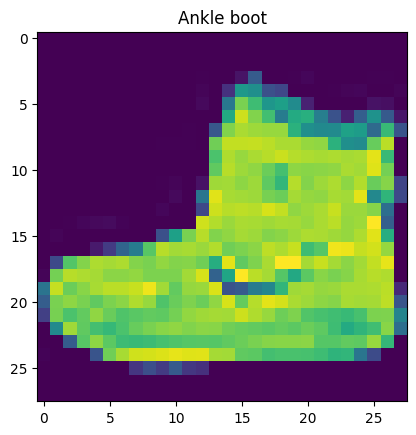

In [11]:
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

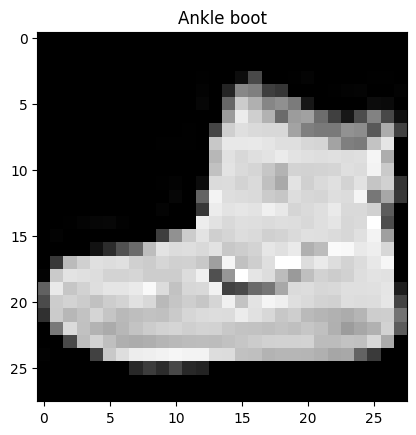

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

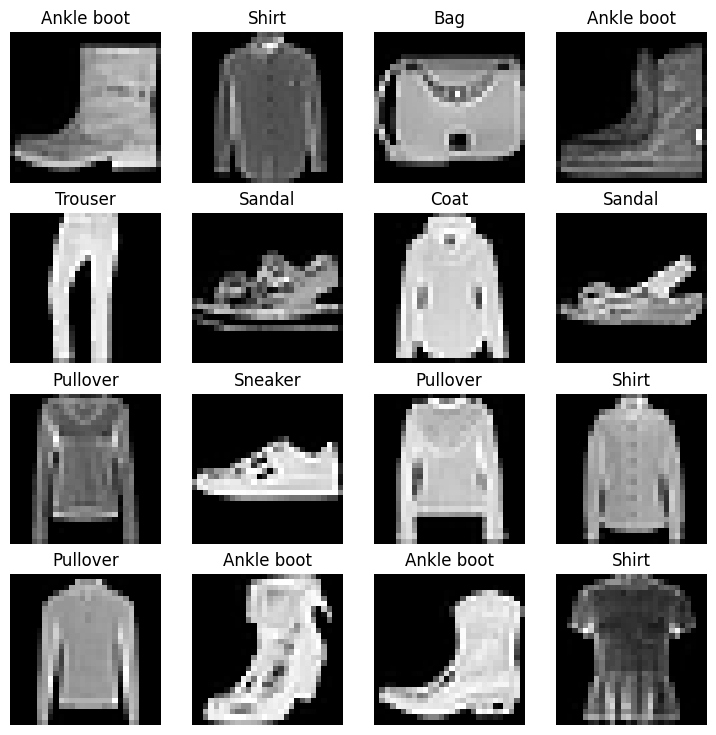

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare Dataloader

Our data is currently a PyTorch Dataset

Dataloader turns our dataset into a Python Iterable

We also use batches at once to train for two reasons
1. It allows our hardware to break the entire data into small groups and process them
2. It gives our neural netowrk more chances to update the gradients per epoch

In [14]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

In [16]:
print(f"Dataloaders : {train_dataloader, test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} batches of batch size : {BATCH_SIZE}")
print(f"Length of test dataloader : {len(test_dataloader)} batches of batch size : {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x000001C8C38C9950>, <torch.utils.data.dataloader.DataLoader object at 0x000001C8C3A5E5D0>)
Length of train dataloader : 1875 batches of batch size : 32
Length of test dataloader : 313 batches of batch size : 32


In [17]:
# What's in a Dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

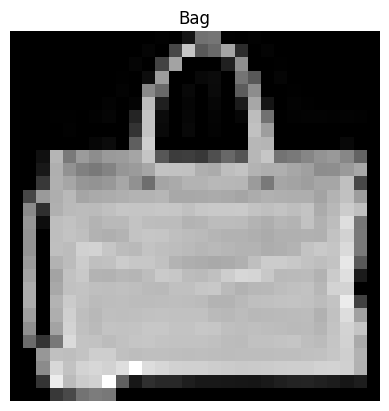

In [18]:
# Show a sample 
# torch.manual_seed(42)
random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0 : Build a baseline model

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flatten {x.shape}")
print(f"Shape after flatten {output.shape}")

print("\nWe do this because we will be using a linear layer in the baseline model. A Linear Layer cannot handle multidimensional data")

Shape before flatten torch.Size([1, 28, 28])
Shape after flatten torch.Size([1, 784])

We do this because we will be using a linear layer in the baseline model. A Linear Layer cannot handle multidimensional data


In [20]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28 * 28, 
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [24]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device : torch.device = None):
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

## 3. Training our model on batches of data

In [25]:
from tqdm.auto import tqdm


train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):

    print(f"Epoch : {epoch}\n-----")

    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        y_preds = model_0(X)

        loss = loss_fn(y_preds, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        
        if batch % 400 == 0 :
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_preds = model_0(X)

            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(y, test_preds.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss : {train_loss} | Test Loss : {test_loss} | Test Acc : {test_acc}\n\n")
    
    train_time_end = timer()
    model_0_traintime = print_train_time(train_time_start, train_time_end, next(model_0.parameters()).device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 0.5877594351768494 | Test Loss : 0.6333174109458923 | Test Acc : 77.04672523961662


Train time on cpu : 8.826 seconds
Epoch : 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 0.47402364015579224 | Test Loss : 0.4659353494644165 | Test Acc : 83.73602236421725


Train time on cpu : 17.193 seconds
Epoch : 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 0.4543067514896393 | Test Loss : 0.47503161430358887 | Test Acc : 83.09704472843451


Train time on cpu : 25.632 seconds


## 4. Make predictions and get Model 0 results

In [26]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module, 
               accuracy_fn,
               device : torch.device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_preds = model(X)

            loss += loss_fn(y_preds, y)

            acc += accuracy_fn(y, y_preds.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : acc}

In [27]:
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device="cpu")
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47403615713119507,
 'model_acc': 83.1070287539936}

In [28]:
# With device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# model_1 = FashionMNISTModelV0(28 * 28, 10, 1)

In [29]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units : int, output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [30]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28 * 28, hidden_units=10, output_shape=len(class_names)).to(device)
model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cuda', index=0))

In [31]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.1)

In [32]:
import torch.utils
import torch.utils.data


def train_step(model : nn.Module, 
               data_loader : torch.utils.data.DataLoader, 
               loss_fn : torch.nn.Module, 
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
    
    """Performs a training with model tring to learn on data_loader"""

    model.train()

    loss_value = 0
    accuracy = 0

    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        y_preds = model(X)

        loss = loss_fn(y_preds, y)
        loss_value += loss
        accuracy += accuracy_fn(y, y_preds.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    loss_value /= len(data_loader)
    accuracy /= len(data_loader)

    print(f"Train Loss : {loss_value} | Train Acc : {accuracy}")

In [33]:
def test_step(
                model : nn.Module, 
                data_loader : torch.utils.data.DataLoader, 
                loss_fn : torch.nn.Module, 
                accuracy_fn,
                device : torch.device = device
            ):
    
    """Performs a testing with model tring to learn on test_dataloader"""

    model.eval()
    loss_value = 0
    accuracy = 0
    
    with torch.inference_mode():

        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_preds = model(X)

            loss_value += loss_fn(y_preds, y)

            accuracy += accuracy_fn(y, y_preds.argmax(dim=1))

        loss_value /= len(data_loader)
        accuracy /= len(data_loader)

    print(f"Test Loss : {loss_value} | Test Acc : {accuracy}")

In [34]:
epochs = 3

start_time = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n---------")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)
    print(f"------------\n\n")
end_time = timer()

model_1_traintime = print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------
Train Loss : 1.0587784051895142 | Train Acc : 62.19166666666667
Test Loss : 0.9961332082748413 | Test Acc : 64.08746006389777
------------


Epoch : 1
---------
Train Loss : 0.9117913246154785 | Train Acc : 66.32166666666667
Test Loss : 0.9575554132461548 | Test Acc : 65.46525559105432
------------


Epoch : 2
---------
Train Loss : 0.8817220330238342 | Train Acc : 67.24833333333333
Test Loss : 0.8904310464859009 | Test Acc : 67.0826677316294
------------


Train time on cuda : 28.903 seconds


In [35]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47403615713119507,
 'model_acc': 83.1070287539936}

In [36]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8926107883453369,
 'model_acc': 67.00279552715655}

## Model 2 : Building a CNN

In [37]:
class FashionMNISTModelV2(nn.Module):
    """
        Model architecture that replicates TinyVGG
    """

    def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)
        )

    def forward(self, x):
        # return self.classifier(self.conv_block_2(self.conv_block_1(x)))
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [38]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [39]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1)

In [40]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 3

start_time = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n----------")
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)
    print(f"----------")

end_time = timer()

# print(f"Time taken is {print_train_time}")
model_2_traintime = print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
----------
Train Loss : 0.5965874791145325 | Train Acc : 78.41833333333334
Test Loss : 0.4027160108089447 | Test Acc : 85.60303514376997
----------
Epoch : 1
----------
Train Loss : 0.356935977935791 | Train Acc : 87.07833333333333
Test Loss : 0.38312333822250366 | Test Acc : 86.28194888178913
----------
Epoch : 2
----------
Train Loss : 0.3215808570384979 | Train Acc : 88.415
Test Loss : 0.334529310464859 | Test Acc : 87.98921725239616
----------
Train time on cuda : 34.876 seconds


In [41]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3340144455432892,
 'model_acc': 88.01916932907348}

In [42]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8926107883453369,
 'model_acc': 67.00279552715655}

In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47403615713119507,
 'model_acc': 83.1070287539936}

In [44]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results["Training Time"] = [model_0_traintime, model_1_traintime, model_2_traintime]
compare_results

,model_name,model_loss,model_acc,Training Time
0,FashionMNISTModelV0,0.474036,83.107029,25.632087
1,FashionMNISTModelV1,0.892611,67.002796,28.902952
2,FashionMNISTModelV2,0.334014,88.019169,34.875620


Text(0, 0.5, 'Model')

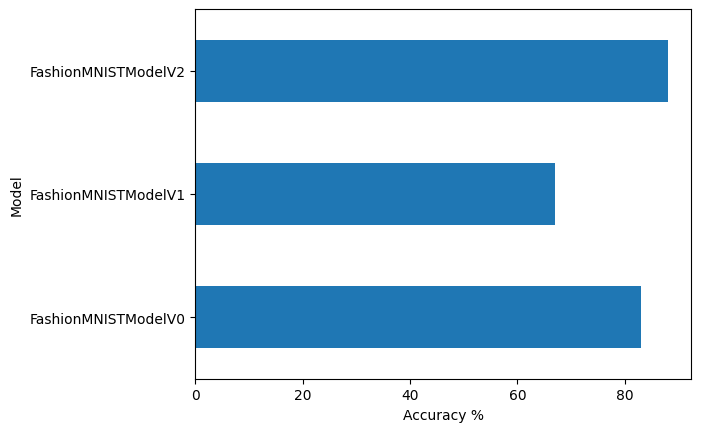

In [45]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel("Model")

In [77]:
def make_predictions(model : torch.nn.Module,
                     data : list, 
                     device: torch.device = device):

    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)    
            y_logit = model(sample)

            pred_prob = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [117]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

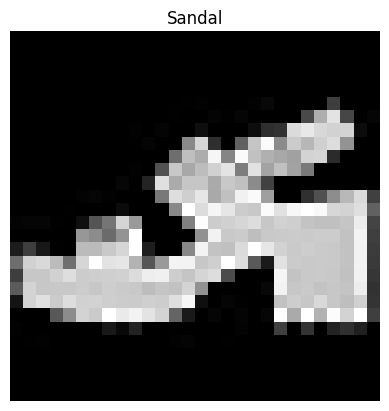

In [118]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [119]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

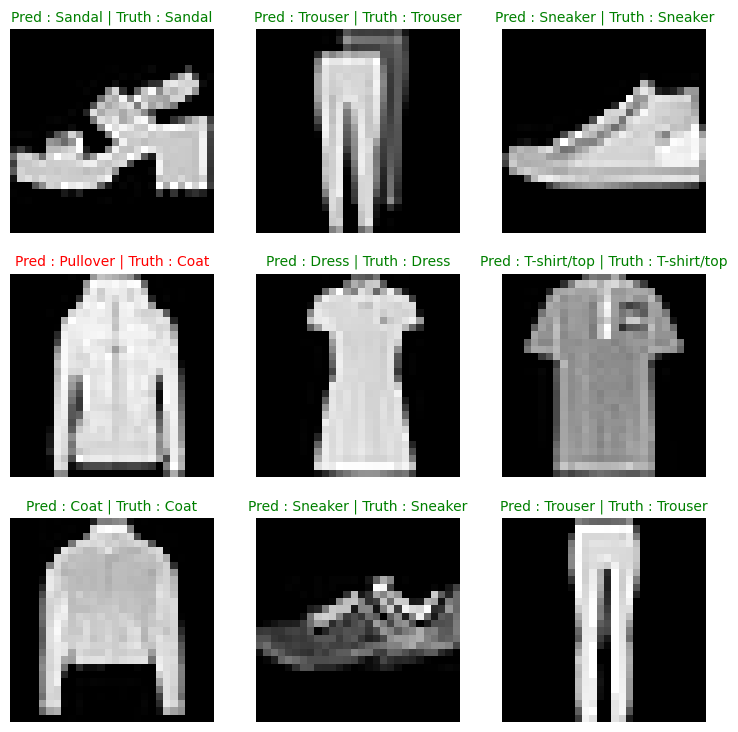

In [120]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    
    pred_label = class_names[pred_probs[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred : {pred_label} | Truth : {truth_label}"
    fontdict = {
        'fontsize' : 10, 
        'color' : 'r'
    }

    if pred_label == truth_label:
        fontdict['color'] = 'g'
    plt.title(title_text, fontdict)
    plt.axis(False)

## Making a confusion matrix

In [121]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)

        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # print('logit', y_logit.squeeze(dim=0))
        y_preds.append(y_pred.cpu())
    
    # print(y_preds)
    y_preds_tensor = torch.cat(y_preds)
    print(y_preds_tensor[:10])

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 9, 6, 8, 4, 5, 8, 8, 7, 5])


In [122]:
# %pip install mlxtend
import mlxtend
mlxtend.__version__

'0.23.1'

In [123]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [124]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

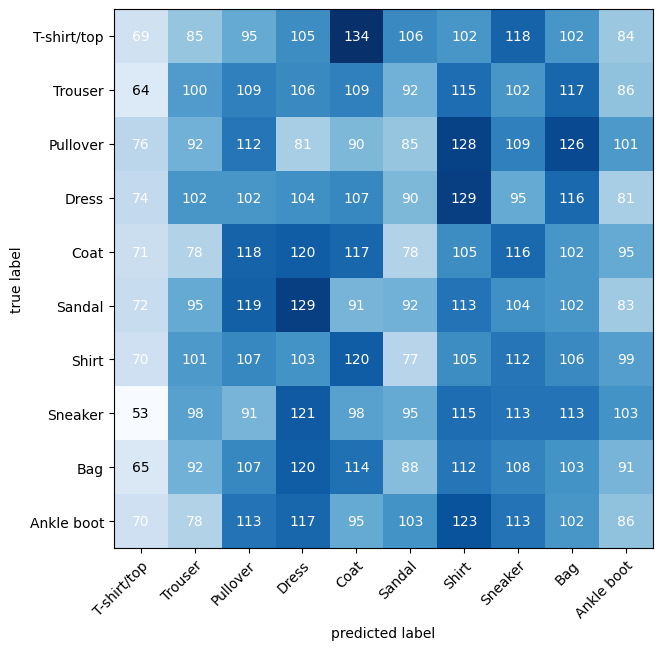

In [125]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [92]:
confmat_tensor

tensor([[ 83, 103, 100,  99, 106,  91, 120, 107,  90, 101],
        [ 80,  75, 108, 113, 114,  81, 108, 111, 103, 107],
        [ 82,  95,  92,  94, 103,  91, 133, 118, 111,  81],
        [ 66,  87,  96, 129,  99,  78, 142, 102, 112,  89],
        [ 74,  92, 111, 122, 106,  96, 103, 103, 103,  90],
        [ 72,  92, 109,  99, 103, 107, 107, 120, 104,  87],
        [ 66,  84, 110, 118, 119,  84, 105, 115, 119,  80],
        [ 59,  84, 107, 127, 103,  81, 124,  97, 128,  90],
        [ 74,  87, 101, 116, 125,  91, 110, 108,  98,  90],
        [ 62,  97, 116, 118,  83,  95, 108, 119, 107,  95]])

In [131]:
from pathlib import Path

MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '04_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to Models\04_model_2.pth


In [132]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [133]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3340144455432892,
 'model_acc': 88.01916932907348}

In [134]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(loaded_model_2, test_dataloader, loss_fn, accuracy_fn, device)

In [135]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3338400423526764,
 'model_acc': 88.02915335463258}

In [137]:
# Check if results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_2_results["model_loss"]), atol=1e-02)

tensor(True)